# Dataset Description



## The dataset contains information about road traffic accidents with the following columns:

`Time`: Time of the accident

`Day_of_week`: Day of the week when the accident occurred

`Age_band_of_driver`: Age group of the driver

`Sex_of_driver`: Gender of the driver

`Educational_level`: Educational level of the driver

`Vehicle_driver_relation`: Relationship of the driver to the vehicle

`Driving_experience`: Driving experience of the driver

`Type_of_vehicle`: Type of vehicle involved in the accident

`Owner_of_vehicle`: Owner of the vehicle

`Service_year_of_vehicle`: Service years of the vehicle

`Area_accident_occured`: Area where the accident occurred

`Lanes_or_Medians`: Lanes or medians at the accident site

`Road_allignment`: Road alignment at the accident site

`Types_of_Junction`: Type of junction at the accident site

`Road_surface_type`: Type of road surface at the accident site

`Road_surface_conditions`: Road surface conditions at the accident site

`Light_conditions`: Light conditions at the time of the accident

`Weather_conditions`: Weather conditions at the time of the accident

`Type_of_collision`: Type of collision

`Number_of_vehicles_involved`: Number of vehicles involved in the accident

`Number_of_casualties`: Number of casualties in the accident

`Vehicle_movement`: Movement of the vehicle during the accident

`Casualty_class`: Class of casualty (driver, passenger, pedestrian)

`Sex_of_casualty`: Gender of the casualty

`Age_band_of_casualty`: Age group of the casualty

`Casualty_severity`: Severity of the casualty

`Work_of_casuality`: Occupation of the casualty

`Fitness_of_casuality`: Fitness of the casualty

`Pedestrian_movement`: Movement of the pedestrian

`Cause_of_accident`: Cause of the accident

`Accident_severity`: Severity of the accident


Here I want to define the Questions I want to answer so I know my steps and workflow.. 

1- What is the most common cause of accidents?  
2- What is the day and time when there are most accidents?  
3- What age group causes the most accidents?  
4- Is weather a factor in the severity of accidents?  

Columns i need:  

Cause_of_accident  
Time  
Day_of_week  
Age_band_of_casualty  
Weather_conditions  
Accident_severity

# Tasks

## 1. Data Cleaning

### Read the dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("D:\T5\Datasets\Task (1) Dataset.csv")
df.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury


In [3]:
df.columns

Index(['Time', 'Day_of_week', 'Age_band_of_driver', 'Sex_of_driver',
       'Educational_level', 'Vehicle_driver_relation', 'Driving_experience',
       'Type_of_vehicle', 'Owner_of_vehicle', 'Service_year_of_vehicle',
       'Defect_of_vehicle', 'Area_accident_occured', 'Lanes_or_Medians',
       'Road_allignment', 'Types_of_Junction', 'Road_surface_type',
       'Road_surface_conditions', 'Light_conditions', 'Weather_conditions',
       'Type_of_collision', 'Number_of_vehicles_involved',
       'Number_of_casualties', 'Vehicle_movement', 'Casualty_class',
       'Sex_of_casualty', 'Age_band_of_casualty', 'Casualty_severity',
       'Work_of_casuality', 'Fitness_of_casuality', 'Pedestrian_movement',
       'Cause_of_accident', 'Accident_severity'],
      dtype='object')

In [4]:
df = df[['Cause_of_accident','Time', 'Day_of_week', 'Age_band_of_casualty', 'Weather_conditions', 'Accident_severity']]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Cause_of_accident     12316 non-null  object
 1   Time                  12316 non-null  object
 2   Day_of_week           12316 non-null  object
 3   Age_band_of_casualty  12316 non-null  object
 4   Weather_conditions    12316 non-null  object
 5   Accident_severity     12316 non-null  object
dtypes: object(6)
memory usage: 577.4+ KB


### Handle Missing Values

In [6]:
df.isnull().sum()

Cause_of_accident       0
Time                    0
Day_of_week             0
Age_band_of_casualty    0
Weather_conditions      0
Accident_severity       0
dtype: int64

### Correct any inconsistent data entries.

In [7]:
for col in df.columns:
    unique_values = df[col].unique()
    print(f"Column: {col}")
    print(f"Unique Values: {unique_values}")
    print("------------------------------------------------------------")

Column: Cause_of_accident
Unique Values: ['Moving Backward' 'Overtaking' 'Changing lane to the left'
 'Changing lane to the right' 'Overloading' 'Other'
 'No priority to vehicle' 'No priority to pedestrian' 'No distancing'
 'Getting off the vehicle improperly' 'Improper parking' 'Overspeed'
 'Driving carelessly' 'Driving at high speed' 'Driving to the left'
 'Unknown' 'Overturning' 'Turnover' 'Driving under the influence of drugs'
 'Drunk driving']
------------------------------------------------------------
Column: Time
Unique Values: ['17:02:00' '1:06:00' '14:15:00' ... '7:24:00' '19:18:00' '2:47:00']
------------------------------------------------------------
Column: Day_of_week
Unique Values: ['Monday' 'Sunday' 'Friday' 'Wednesday' 'Saturday' 'Thursday' 'Tuesday']
------------------------------------------------------------
Column: Age_band_of_casualty
Unique Values: ['na' '31-50' '18-30' 'Under 18' 'Over 51' '5']
------------------------------------------------------------
Column

we have in coulmn (Cause_of_accident) : Other, Unknown  
and in (Age_band_of_casualty) : na , 5  
and in (Weather_conditions) : Other, Unknown  

so this is 3 columns i have to deal with it

In [8]:
df['Cause_of_accident'].value_counts()

Cause_of_accident
No distancing                           2263
Changing lane to the right              1808
Changing lane to the left               1473
Driving carelessly                      1402
No priority to vehicle                  1207
Moving Backward                         1137
No priority to pedestrian                721
Other                                    456
Overtaking                               430
Driving under the influence of drugs     340
Driving to the left                      284
Getting off the vehicle improperly       197
Driving at high speed                    174
Overturning                              149
Turnover                                  78
Overspeed                                 61
Overloading                               59
Drunk driving                             27
Unknown                                   25
Improper parking                          25
Name: count, dtype: int64

In [9]:
df['Cause_of_accident'] = df['Cause_of_accident'].replace('Unknown', 'Other')

In [10]:
df['Age_band_of_casualty'].value_counts()

Age_band_of_casualty
na          4443
18-30       3145
31-50       2455
Under 18    1035
Over 51      994
5            244
Name: count, dtype: int64

We have too many values in na, so we can't remove them, and the best practice for this in my opinion is to combine it with categories 18-13. Because this age mostly they Drive!

In [11]:
df['Age_band_of_casualty'] = df['Age_band_of_casualty'].replace('na', '18-30')
df['Age_band_of_casualty'] = df['Age_band_of_casualty'].replace('5', '18-30')

In [12]:
df['Weather_conditions'].value_counts()

Weather_conditions
Normal               10063
Raining               1331
Other                  296
Unknown                292
Cloudy                 125
Windy                   98
Snow                    61
Raining and Windy       40
Fog or mist             10
Name: count, dtype: int64

In [13]:
df['Weather_conditions'] = df['Weather_conditions'].replace('Unknown', 'Other')

In [14]:
for col in df.columns:
    unique_values = df[col].unique()
    print(f"Column: {col}")
    print(f"Unique Values: {unique_values}")
    print("------------------------------------------------------------")

Column: Cause_of_accident
Unique Values: ['Moving Backward' 'Overtaking' 'Changing lane to the left'
 'Changing lane to the right' 'Overloading' 'Other'
 'No priority to vehicle' 'No priority to pedestrian' 'No distancing'
 'Getting off the vehicle improperly' 'Improper parking' 'Overspeed'
 'Driving carelessly' 'Driving at high speed' 'Driving to the left'
 'Overturning' 'Turnover' 'Driving under the influence of drugs'
 'Drunk driving']
------------------------------------------------------------
Column: Time
Unique Values: ['17:02:00' '1:06:00' '14:15:00' ... '7:24:00' '19:18:00' '2:47:00']
------------------------------------------------------------
Column: Day_of_week
Unique Values: ['Monday' 'Sunday' 'Friday' 'Wednesday' 'Saturday' 'Thursday' 'Tuesday']
------------------------------------------------------------
Column: Age_band_of_casualty
Unique Values: ['18-30' '31-50' 'Under 18' 'Over 51']
------------------------------------------------------------
Column: Weather_condition

### Ensure data types are appropriate for each column.

---



In [15]:
df.head()

,Cause_of_accident,Time,Day_of_week,Age_band_of_casualty,Weather_conditions,Accident_severity
0,Moving Backward,17:02:00,Monday,18-30,Normal,Slight Injury
1,Overtaking,17:02:00,Monday,18-30,Normal,Slight Injury
2,Changing lane to the left,17:02:00,Monday,31-50,Normal,Serious Injury
3,Changing lane to the right,1:06:00,Sunday,18-30,Normal,Slight Injury
4,Overtaking,1:06:00,Sunday,18-30,Normal,Slight Injury


All columns are Category except Time

In [16]:
df.dtypes

Cause_of_accident       object
Time                    object
Day_of_week             object
Age_band_of_casualty    object
Weather_conditions      object
Accident_severity       object
dtype: object

In [17]:
cat_col = ['Cause_of_accident','Day_of_week', 'Age_band_of_casualty', 'Weather_conditions', 'Accident_severity']

for col in cat_col:
    df[col] = df[col].astype('category')


df.dtypes

Cause_of_accident       category
Time                      object
Day_of_week             category
Age_band_of_casualty    category
Weather_conditions      category
Accident_severity       category
dtype: object

## 2. Exploratory Data Analysis (EDA)

### Perform summary statistics on the dataset.

In [18]:
df.describe()

,Cause_of_accident,Time,Day_of_week,Age_band_of_casualty,Weather_conditions,Accident_severity
count,12316,12316,12316,12316,12316,12316
unique,19,1074,7,4,8,3
top,No distancing,15:30:00,Friday,18-30,Normal,Slight Injury
freq,2263,120,2041,7832,10063,10415


## 3. Data Visualization

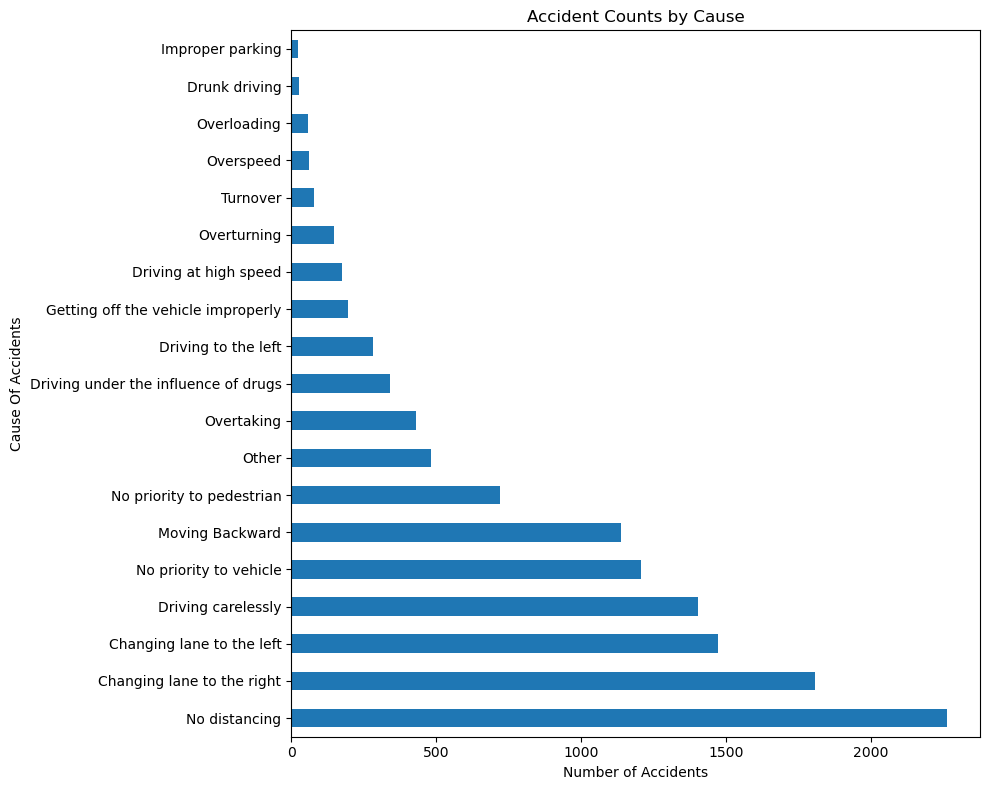

In [45]:
Acc_caus = df['Cause_of_accident'].value_counts()

Acc_caus.plot(kind='barh',figsize=(10,8))
plt.xlabel('Number of Accidents')
plt.ylabel('Cause Of Accidents')
plt.title('Accident Counts by Cause') 
plt.tight_layout()
plt.show()  

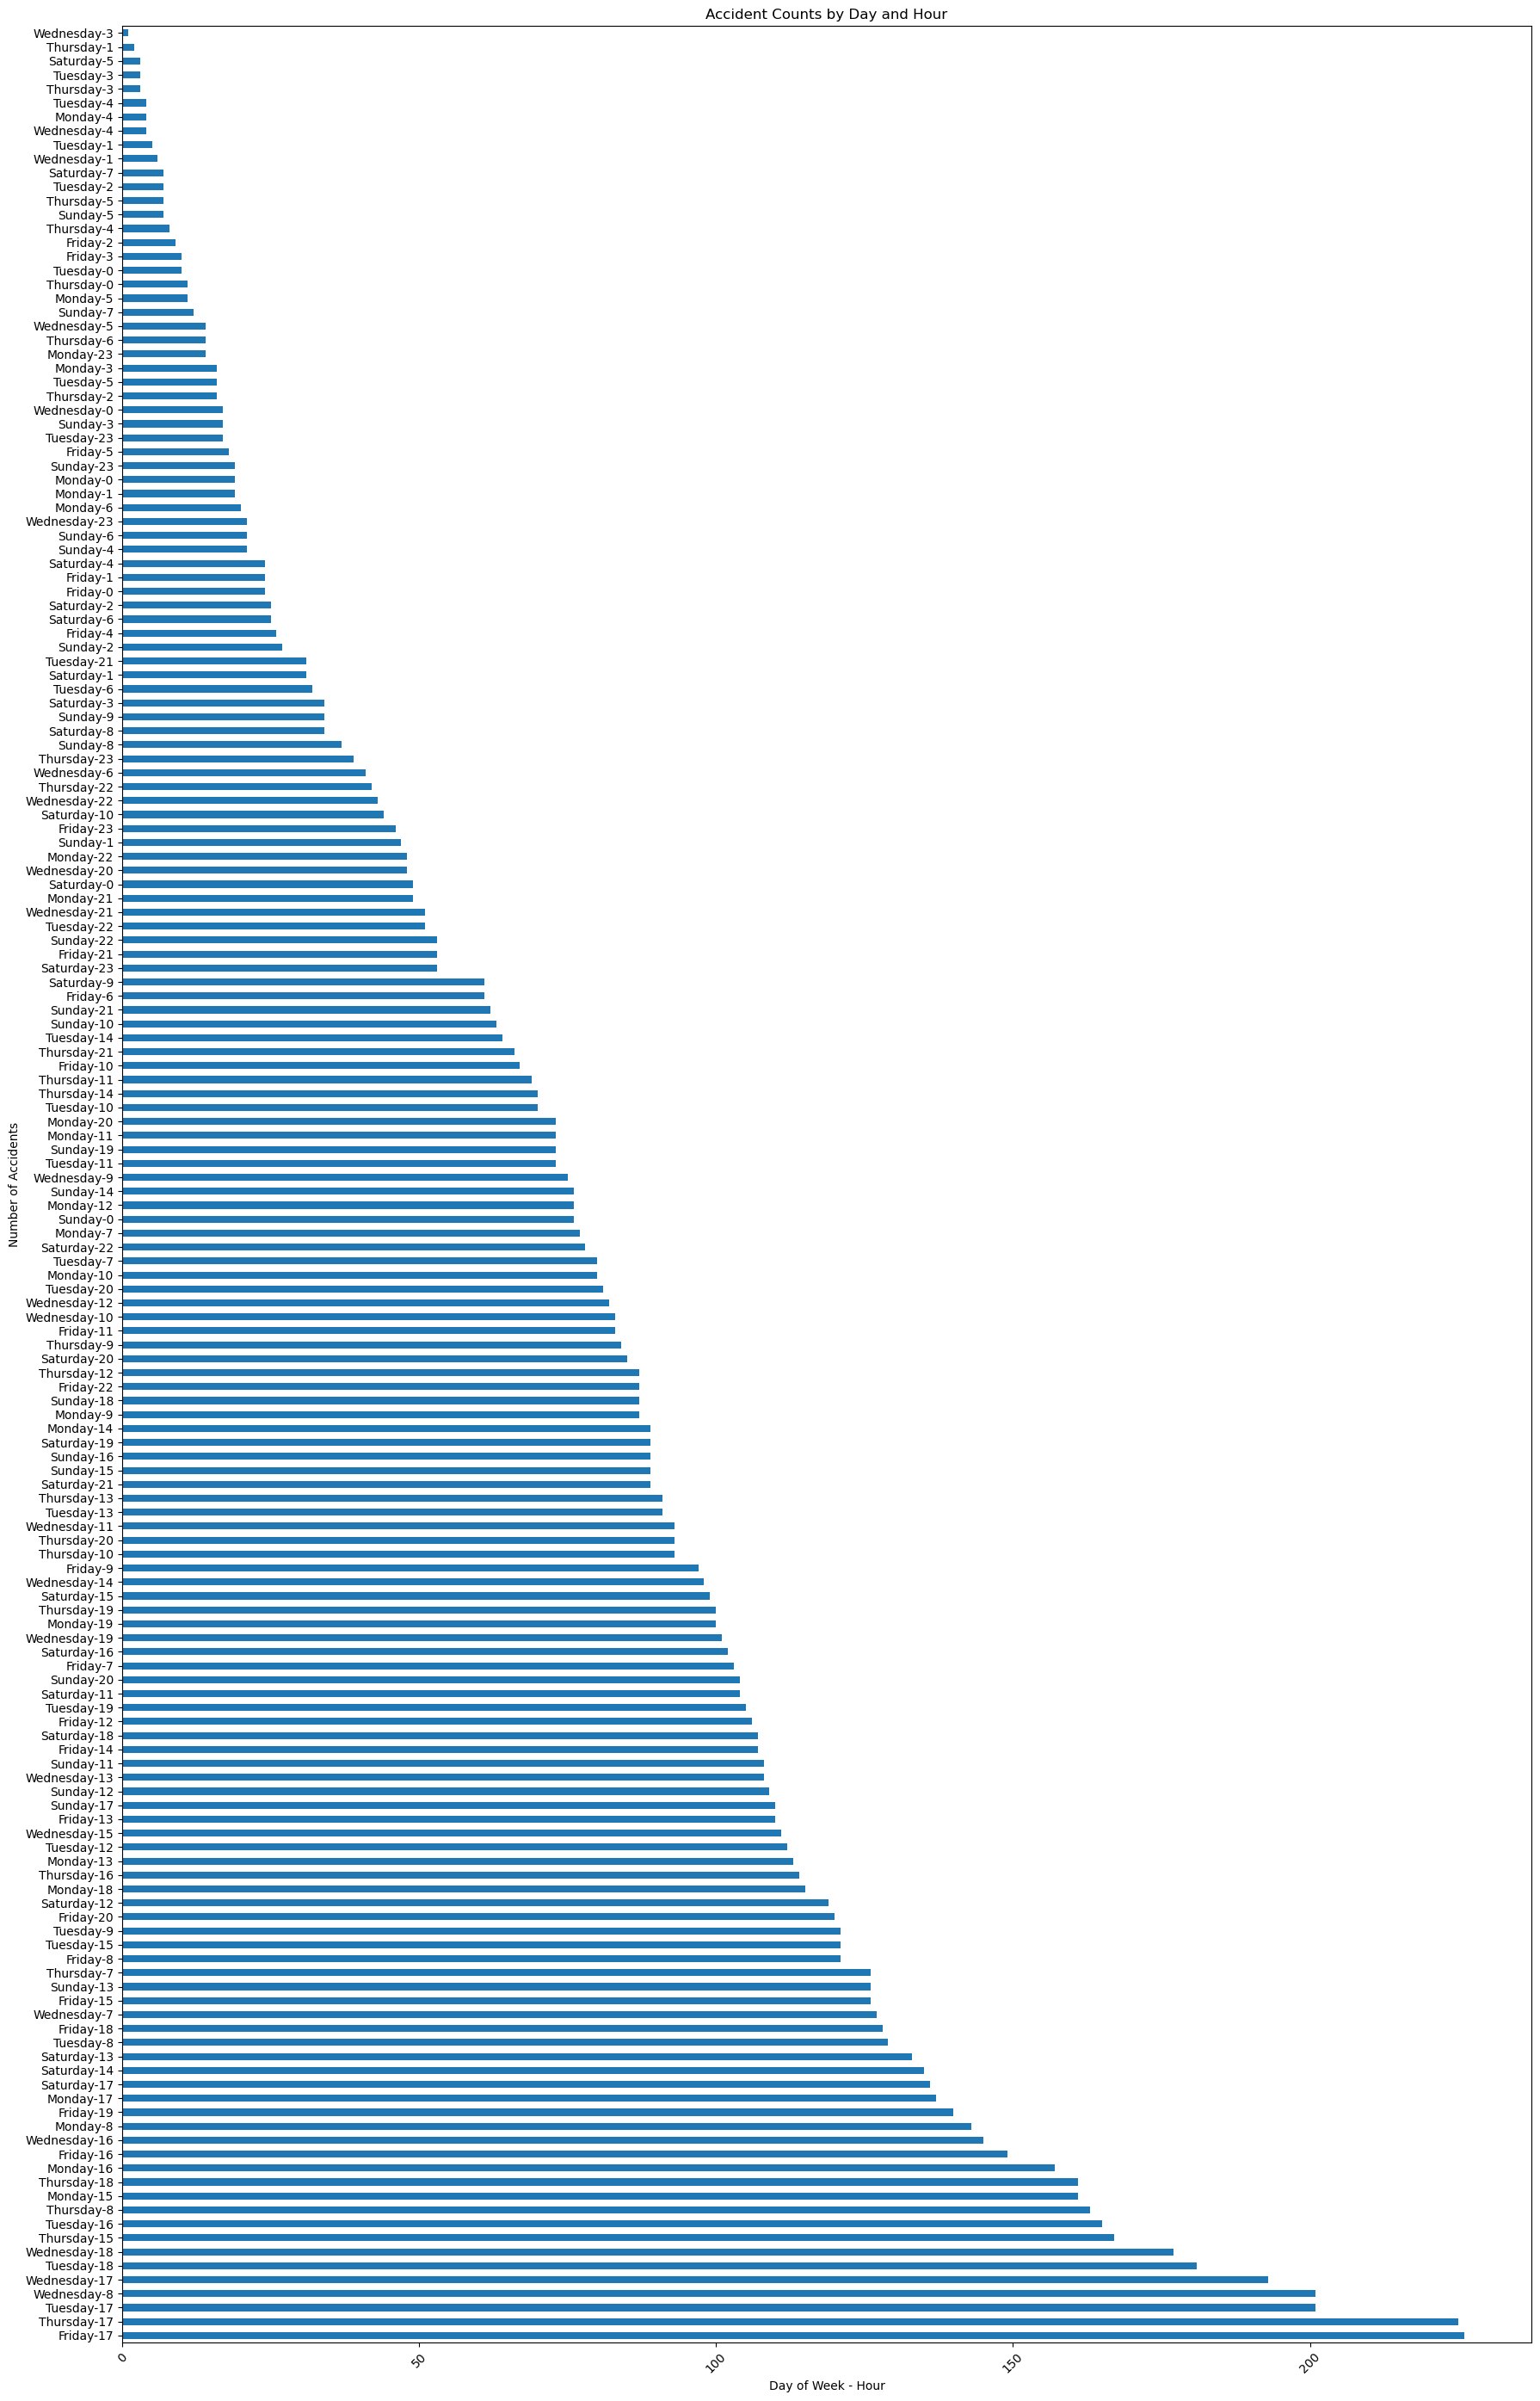

The day and time with the most accidents: Friday at 17 o'clock


In [31]:
df['Hour'] = pd.to_datetime(df['Time'], format='%H:%M:%S').dt.hour

df['Day_Hour'] = df['Day_of_week'].astype(str) + '-' + df['Hour'].astype(str)

accident_counts = df['Day_Hour'].value_counts()

day_hour_with_most_accidents = accident_counts.idxmax()

day, hour = day_hour_with_most_accidents.split('-')

accident_counts.plot(kind='barh',figsize=(18,28))
plt.xlabel('Day of Week - Hour')
plt.ylabel('Number of Accidents')
plt.title('Accident Counts by Day and Hour')
plt.xticks(rotation=45)  
plt.tight_layout()
plt.show()  

print(f"The day and time with the most accidents: {day} at {hour} o'clock")

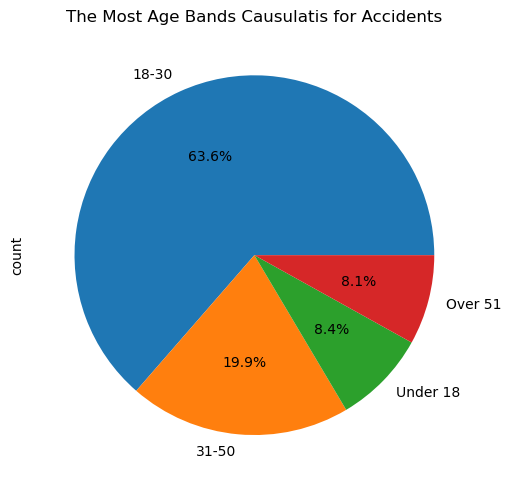

In [34]:
the_most_age = df['Age_band_of_casualty'].value_counts()

the_most_age.plot(kind='pie',figsize=(8,5), autopct='%1.1f%%')
plt.title('The Most Age Bands Causulatis for Accidents')
plt.xticks(rotation=45)  
plt.tight_layout()
plt.show()  

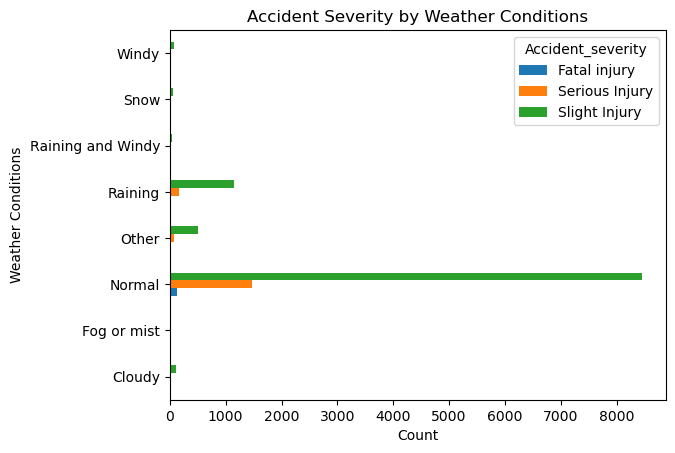

In [47]:
cross_tab = pd.crosstab(df['Weather_conditions'], df['Accident_severity'])

cross_tab.plot(kind='barh')
plt.title('Accident Severity by Weather Conditions')
plt.xlabel('Count')
plt.ylabel('Weather Conditions')
plt.show()

## 4. Insights and Conclusions

1- What is the most common cause of accidents?  
No Distance  
  
2- What is the day and time when there are most accidents?  
Friday at 5 pm, then Thursday also at 5 pm   
  
3- What age group causes the most accidents?  
Bands 18-30, they Take 63.6%  
  
4- Is weather a factor in the severity of accidents?  
Mostly not affected by Weather, mostly Slight Injury on Normal days also on Raining days  
